In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.figsize': (7,3), 'figure.dpi': 120})

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/baothanhquach1661/DataSet/main/wholesome_customers_data.csv')

In [5]:
# df.info()
# df.describe()
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### EDA
#### Task: create a scatterplot showing the relation between Milk and Grocery spending, colored by Channel column

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

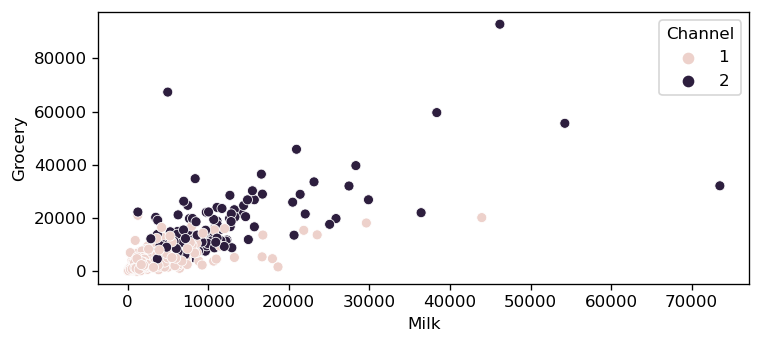

In [6]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')

#### Task: use seaborn to create a histogram of Milk spending, colored by Channel. Figure out how to use seaborn to "stack" the channels, instead of have them overlap?

<AxesSubplot:xlabel='Milk', ylabel='Count'>

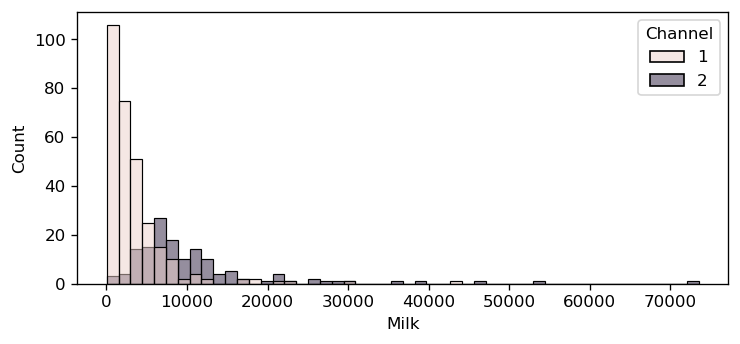

In [8]:
sns.histplot(data=df, x='Milk', hue='Channel')

#### Task: create an annotated clustermap of the correlations between spending on different categories

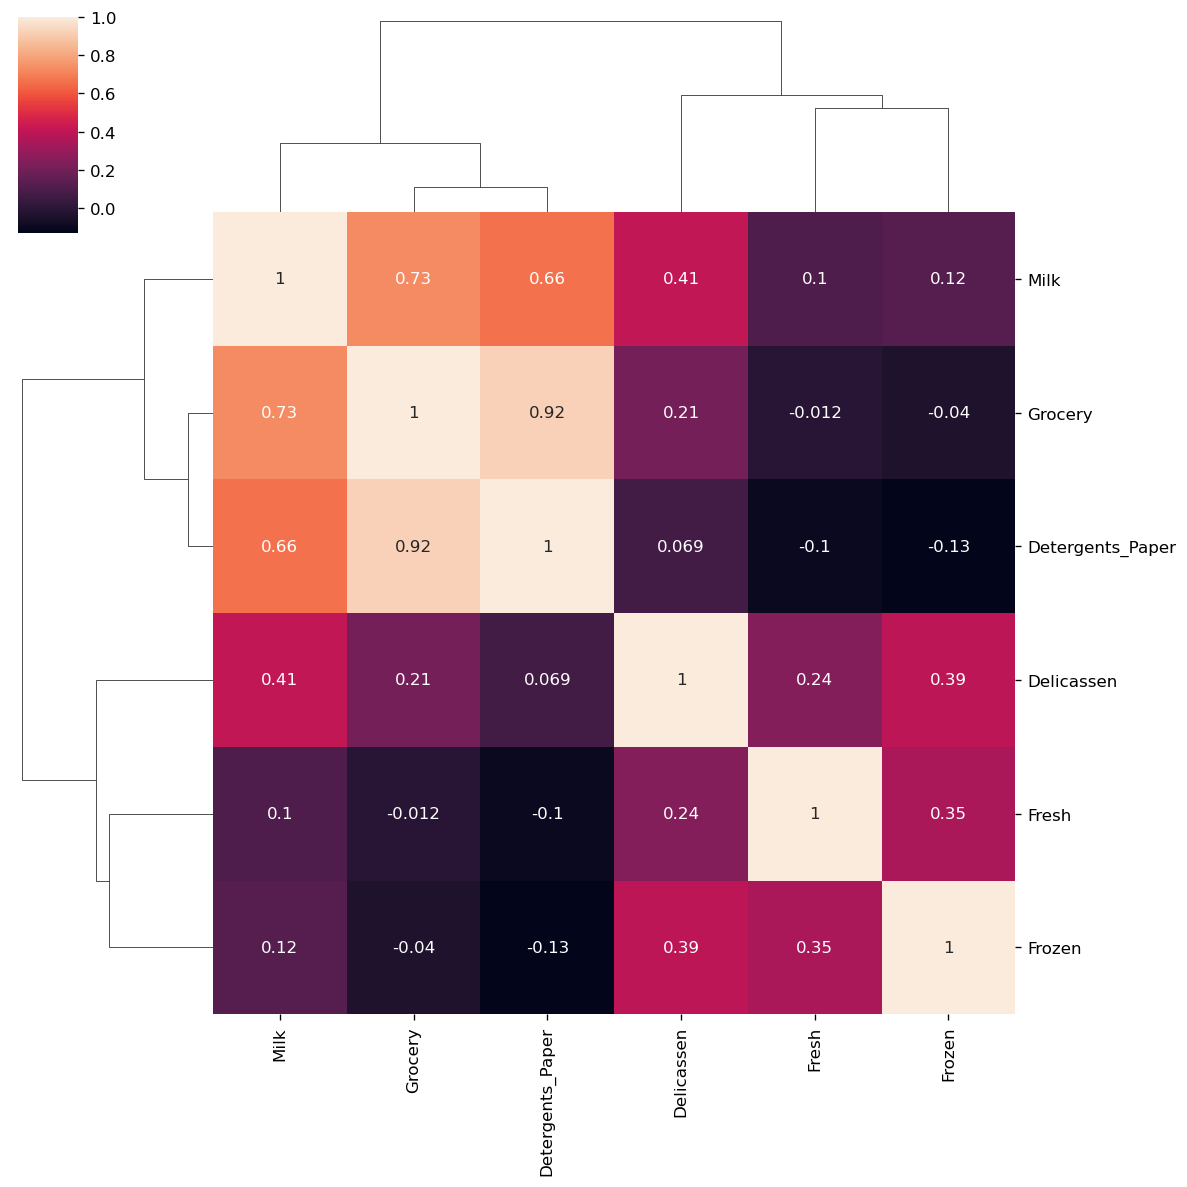

In [11]:
sns.clustermap(df.drop(['Region', 'Channel'], axis=1).corr(), annot=True)

#### Task: create a pairplot of the dataframe, colored by Region

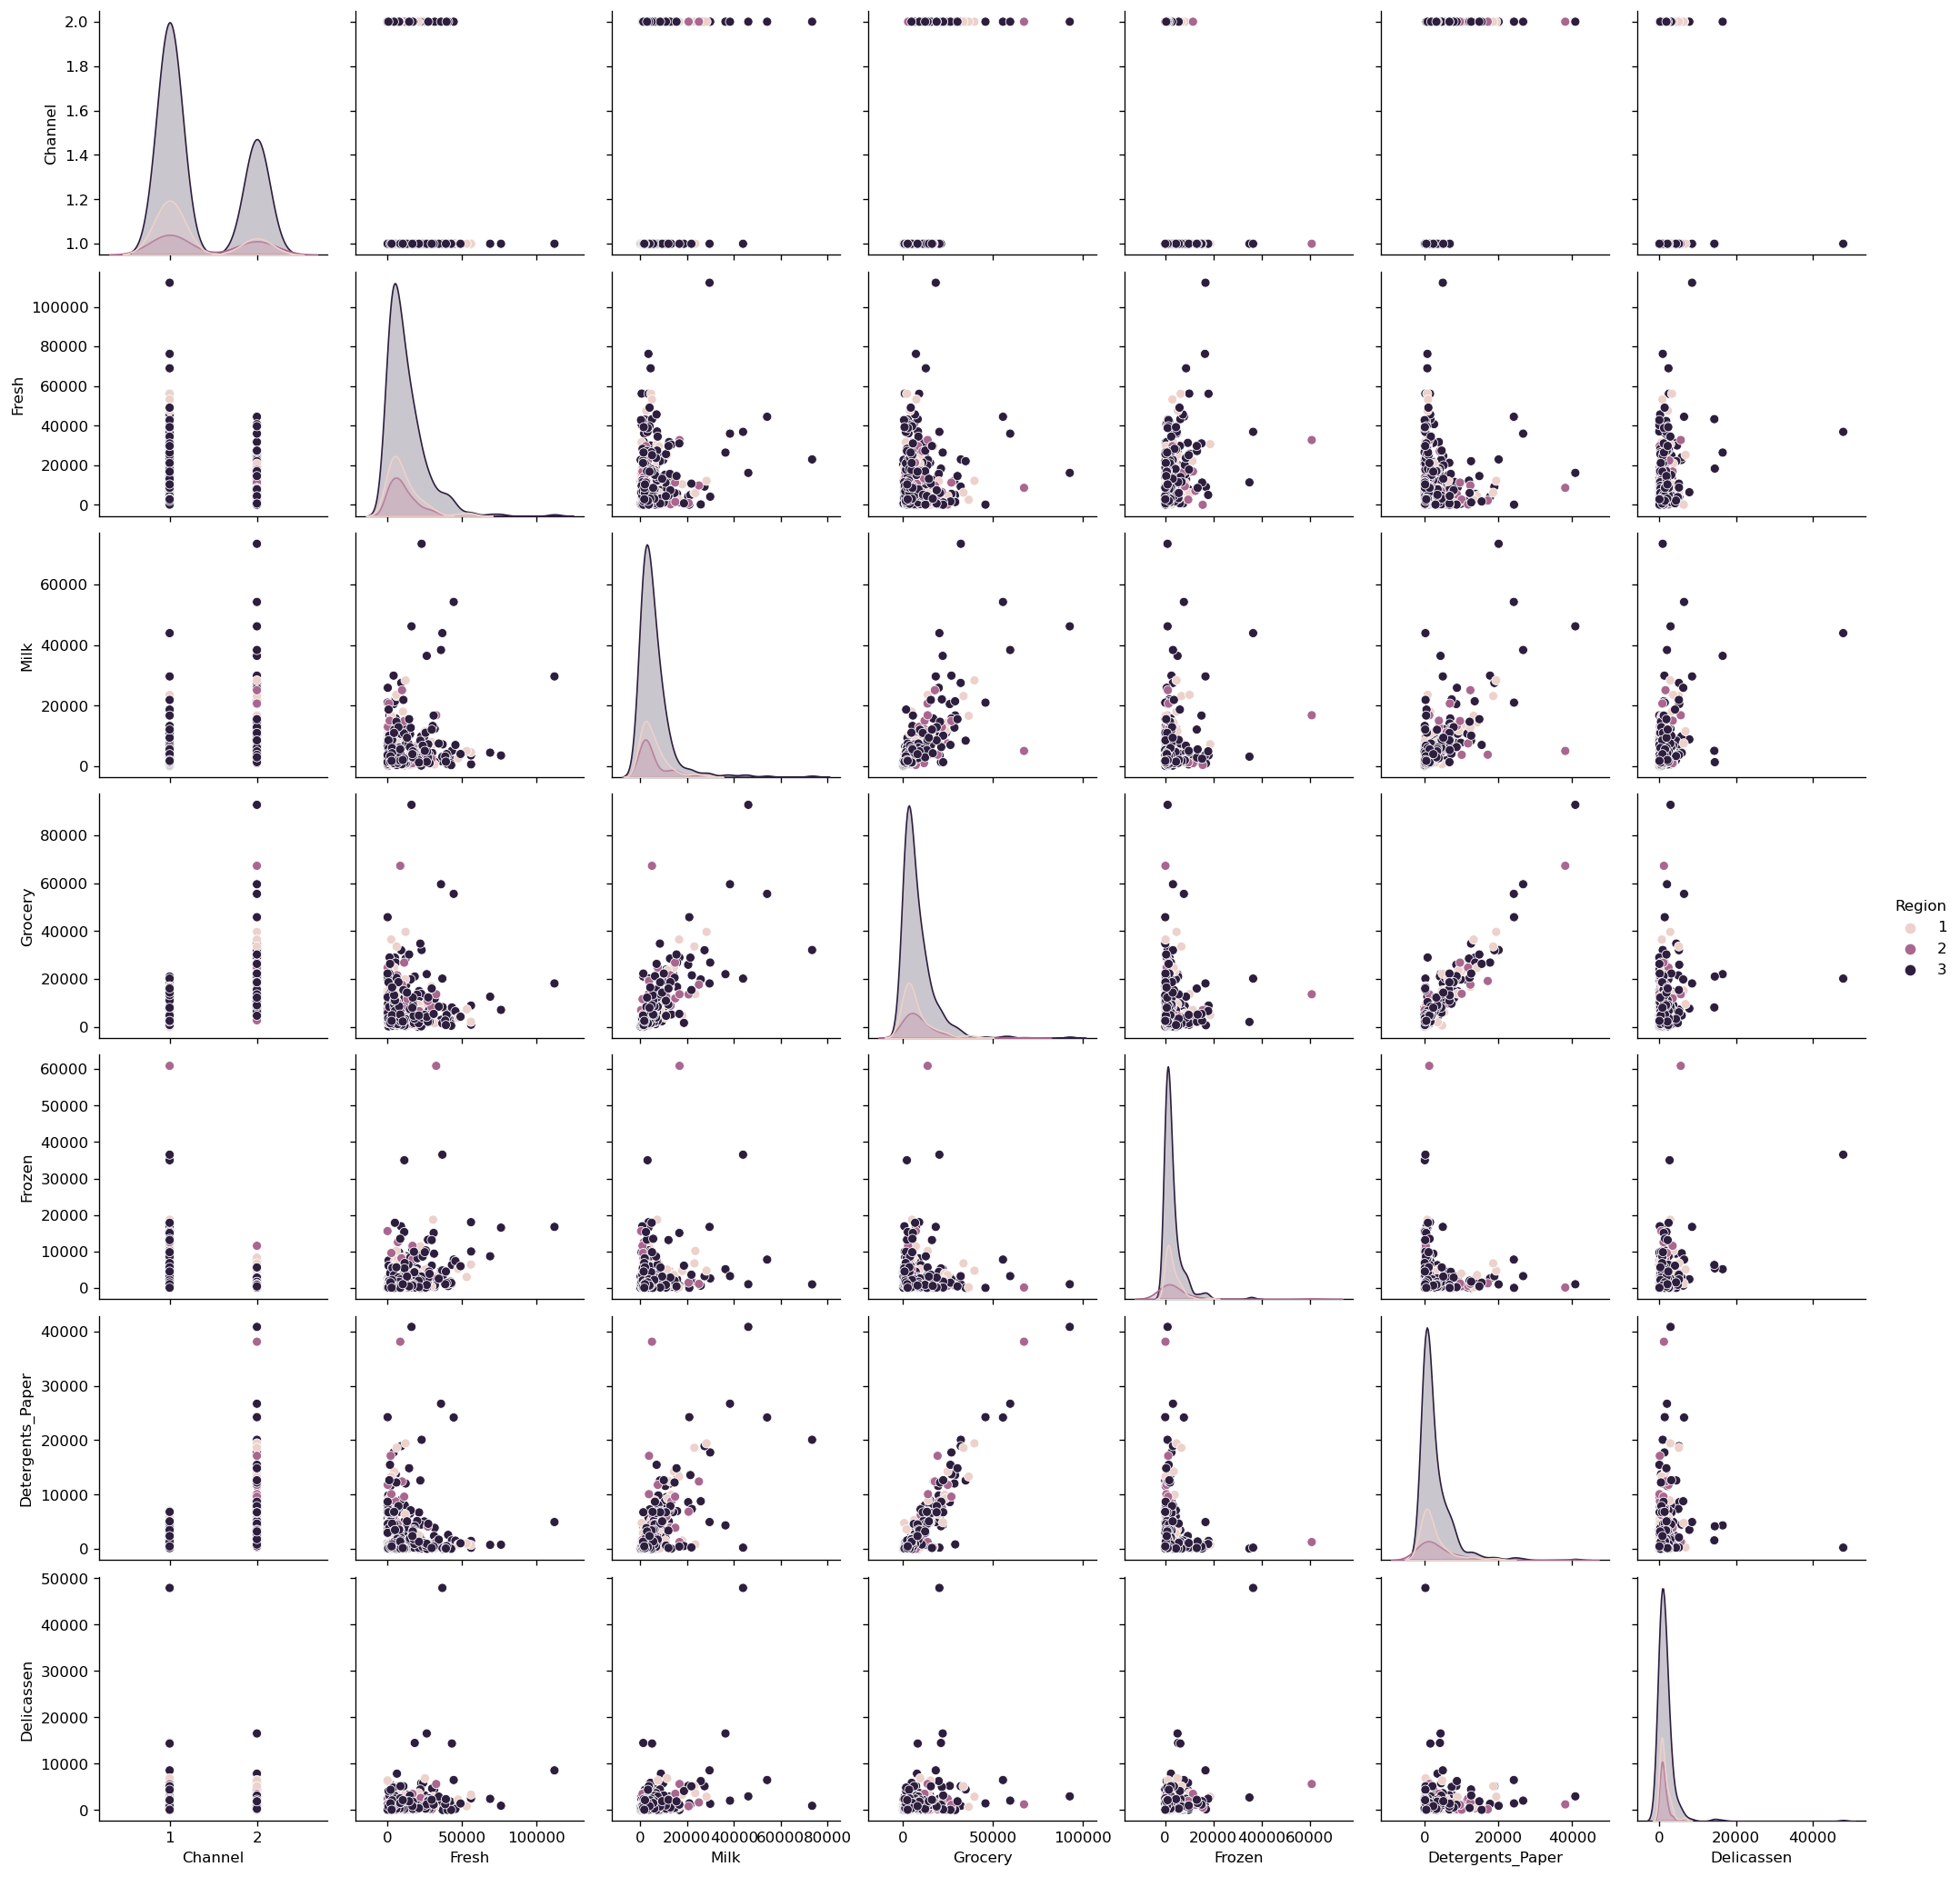

In [12]:
sns.pairplot(df, hue='Region')

### DBSCAN

#### Task: since the values of the features are in different orders of magnitude, lets scale the data. use StandardScaler to scale it

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
outlier_precent = []

for eps in np.linspace(0.001, 3, 50):
    
    dbscan = DBSCAN(eps=eps, min_samples=2*scaled_data.shape[1])
    dbscan.fit(scaled_data)
    
    perc_outliers = 100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_precent.append(perc_outliers)

#### Task: create a line plot of the percentage of outlier points versus the epsilon value choice.

<AxesSubplot:>

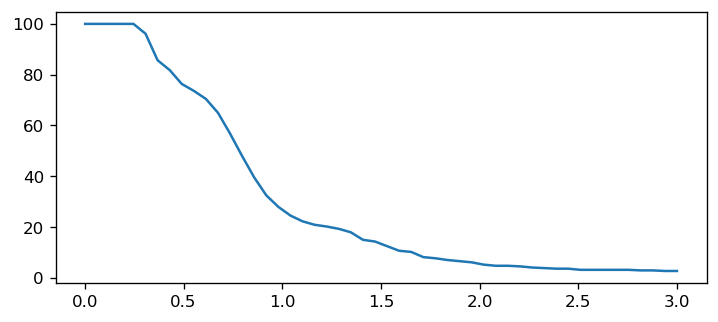

In [17]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=outlier_precent)

### DBSCAN with chosen Epsilon

#### Task: based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: for reference, the solutions use eps=2

In [18]:
dbscan = DBSCAN(eps=2, min_samples=scaled_data.shape[1])
dbscan.fit(scaled_data)

DBSCAN(eps=2, min_samples=8)

#### Task: create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

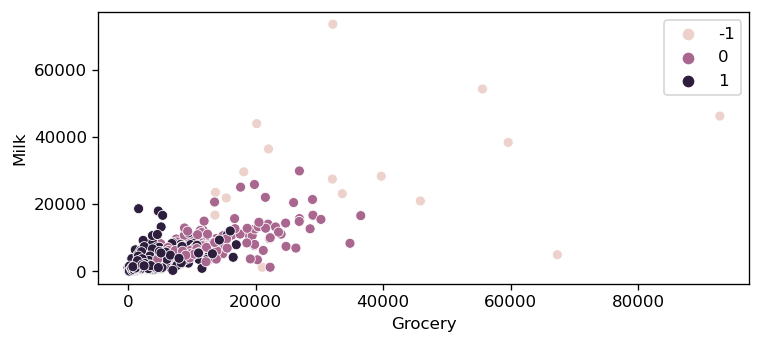

In [19]:
sns.scatterplot(data=df, x='Grocery', y='Milk', hue=dbscan.labels_)

#### Task: create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.

In [20]:
df['Labels'] = dbscan.labels_

In [21]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


#### Task: compare the statistical mean of the clusters and outliers for the spending amounts on the categories.

In [26]:
cats = df.drop(['Channel', 'Region'], axis=1)
cat_means = cats.groupby('Labels').mean()

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(cat_means)

<AxesSubplot:ylabel='Labels'>

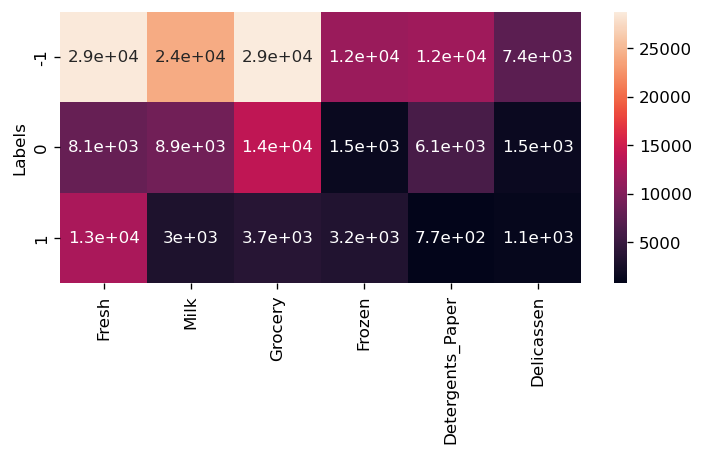

In [28]:
sns.heatmap(cat_means, annot=True)

In [29]:
pd.DataFrame(scaled_data, cat_means.index, cat_means.columns)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.277723,0.411089,0.000000,0.475949,0.069925
1,0.214549,0.000000,0.000000,0.172714,0.000000,0.000000
